# NAFLD detection using RNA-Seq data


__Content creators:__  Mahdi Anvari, Sadegh Rizi

**University of Tehran, Department of Biotechnology**

# Q1 - Python section ##

In [1]:
# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
# Load Data
normal_counts = pd.read_csv('Normal.counts.voom.csv')
meta_data = pd.read_csv('meta_data.csv')

In [3]:
normal_counts.head()

,gene,DLDR_0001,DLDR_0002,DLDR_0003,DLDR_0004,DLDR_0005,DLDR_0006,DLDR_0007,DLDR_0008,DLDR_0009,...,DLDR_0183,DLDR_0184,DLDR_0185,DLDR_0186,DLDR_0187,DLDR_0188,DLDR_0189,DLDR_0190,DLDR_0191,DLDR_0192
0,ENSG00000000003,5.965571,5.741587,5.996891,5.551919,6.430237,6.234619,6.071503,6.441882,5.752712,...,6.304802,6.576246,6.735760,6.344234,6.608924,6.480745,6.360397,6.367705,6.604050,6.514539
1,ENSG00000000005,1.612375,2.147793,0.418542,0.702492,1.215978,0.920810,0.458163,0.927224,1.089389,...,-0.031596,-1.091275,-0.942637,-0.026585,-0.757399,-1.083676,0.886550,-0.902201,-0.865036,-1.588749
2,ENSG00000000419,4.133821,4.120969,4.086129,4.116240,4.393797,4.390909,4.148242,4.554655,4.203819,...,4.176599,4.244459,4.342765,4.179319,4.274450,4.361634,4.093280,4.148010,4.351489,3.859711
3,ENSG00000000457,4.111056,3.922234,3.964871,3.978350,4.018235,3.864521,4.263119,3.896271,4.139546,...,4.378342,4.453838,4.685598,4.438796,4.042577,4.313540,4.205119,4.506058,4.072137,4.341988
4,ENSG00000000460,4.150662,3.732756,3.634637,3.853979,3.614220,3.500857,4.000565,4.016287,3.904500,...,2.974209,3.720038,4.640011,3.814717,2.126408,3.120196,3.336802,3.982071,3.143138,2.741172


In [4]:
normal_counts.shape

(17396, 193)

there are 192 samples with 17396 features

In [5]:
meta_data.head()

,Patient_ID,SEX,BMI_surg,Age,Run,Diabet,Simplified_class
0,DLDR_0001,Female,35.214555,55,SRR8378590,Non Diabetic,Normal
1,DLDR_0002,Female,39.421748,47,SRR8378589,Diabetic,Normal
2,DLDR_0003,Male,48.758108,46,SRR8378432,Non Diabetic,Normal
3,DLDR_0004,Female,41.822607,36,SRR8378431,Non Diabetic,Normal
4,DLDR_0005,Female,53.582192,54,SRR8378434,Non Diabetic,Normal


In [6]:
meta_data.shape

(192, 7)

In [7]:
print("Number of Normal samples: ", meta_data['Simplified_class'].to_list().count("Normal"))
print("Number of Non_advanced_Fibrosis samples: ", meta_data['Simplified_class'].to_list().count("Non_advanced_Fibrosis"))
print("Number of Advanced_fibrosis: ", meta_data['Simplified_class'].to_list().count("Advanced_fibrosis"))

Number of Normal samples:  74
Number of Non_advanced_Fibrosis samples:  53
Number of Advanced_fibrosis:  65


Let's split our data and labels to train and test sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(normal_counts.iloc[0:,1:].T, meta_data['Simplified_class'], test_size=0.3, random_state = 10101)

In [10]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,17386,17387,17388,17389,17390,17391,17392,17393,17394,17395
DLDR_0036,5.820135,-1.060061,4.388400,4.080172,2.564430,3.552685,11.011379,4.682305,6.951539,4.589555,...,4.851631,-0.719024,-0.719024,-1.266512,-0.323095,3.157170,0.459313,3.115198,-2.645023,0.760969
DLDR_0081,6.546299,0.582165,3.752090,4.645175,3.840899,3.201075,11.433579,3.705547,7.143316,5.482169,...,5.050934,1.681701,-0.640228,0.096738,0.582165,4.041596,0.096738,2.418666,-2.225190,0.582165
DLDR_0191,6.604050,-0.865036,4.351489,4.072137,3.143138,4.037476,11.782524,4.358527,8.468526,5.013154,...,5.112244,-2.002540,-0.076540,-1.154543,-0.624028,2.050571,-1.517113,2.084923,-4.324468,0.067849
DLDR_0188,6.480745,-1.083676,4.361634,4.313540,3.120196,1.941859,11.451981,4.556052,7.183779,5.066071,...,5.204366,2.086249,0.501286,0.632531,-0.431600,2.616763,1.063165,1.941859,-2.306069,0.632531
DLDR_0130,6.550016,-1.222374,4.534941,4.370763,3.512952,2.517867,12.041229,4.315374,7.485927,4.655817,...,5.519093,-0.037949,-0.289488,-1.874450,-0.981365,2.594319,0.447478,2.556600,-2.359877,0.932905


In [11]:
X_train.shape

(134, 17396)

In [12]:
y_train.head()

35                    Normal
80         Advanced_fibrosis
190                   Normal
187                   Normal
129    Non_advanced_Fibrosis
Name: Simplified_class, dtype: object

In [13]:
y_train.shape

(134,)

Labels distribution in train set:

In [14]:
print("Number of Normal samples: ", y_train.to_list().count("Normal"))
print("Number of Non_advanced_Fibrosis samples: ", y_train.to_list().count("Non_advanced_Fibrosis"))
print("Number of Advanced_fibrosis samples: ", y_train.to_list().count("Advanced_fibrosis"))

Number of Normal samples:  44
Number of Non_advanced_Fibrosis samples:  38
Number of Advanced_fibrosis samples:  52


Now, let’s save the training set data to use in the R Jupyter Notebook for feature selection

In [15]:
X_train.T.to_csv('train_normal_counts.csv', index=False)
y_train.T.to_csv('train_meta_data.csv', index=False)

#### Run R Jupyter Notebook

Let's load the output of R to continue the task

In [16]:
subset_data = pd.read_csv('subset_data.csv')

In [17]:
subset_data

,Unnamed: 0,DLDR_0036,DLDR_0081,DLDR_0191,DLDR_0188,DLDR_0130,DLDR_0013,DLDR_0079,DLDR_0131,DLDR_0135,...,DLDR_0175,DLDR_0052,DLDR_0087,DLDR_0155,DLDR_0092,DLDR_0187,DLDR_0186,DLDR_0179,DLDR_0182,DLDR_0001
0,10,4.589555,5.482169,5.013154,5.066071,4.655817,4.299078,4.752957,5.409514,4.993777,...,4.853565,4.567173,4.985158,5.234776,4.900754,4.923087,5.004500,5.058062,5.002454,4.221450
1,57,-0.719024,0.582165,-1.154543,-1.083676,-0.289488,-0.006469,-1.138550,-4.060128,-2.104255,...,-2.285986,-0.110595,-0.385647,-3.580073,0.317259,-0.757399,-3.486017,-1.346471,-1.103280,-0.005377
2,265,0.587637,-2.225190,-0.076540,0.196432,0.272391,2.523150,1.424386,0.332190,0.217673,...,1.083248,0.352377,-0.309698,0.120366,0.890444,-0.291735,0.811664,-0.246936,0.416094,2.729099
3,275,1.662405,2.529697,1.508422,1.991612,1.467942,1.934152,2.031375,2.048397,0.528013,...,1.083248,2.556469,2.055951,1.374123,1.902221,1.838969,1.643266,1.272439,1.932344,2.467558
4,278,5.529902,5.846272,5.553583,5.359267,5.774549,4.962662,5.201300,5.500205,5.782051,...,5.862067,5.038603,5.665231,5.781140,5.745159,5.438062,5.570169,5.558701,5.733822,5.220121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,16863,3.811126,3.329399,2.183327,2.412750,3.323819,2.690386,3.515760,3.197260,2.112975,...,1.555316,3.901539,3.344479,1.911780,3.763838,3.667268,2.742802,2.446087,3.857108,2.844001
523,16887,3.576080,2.418666,3.355012,3.288878,3.231084,3.757011,2.435441,3.079423,2.393996,...,2.974541,3.737944,2.476362,2.817958,2.596331,3.203431,3.162640,2.353968,3.445156,3.271068
524,16892,4.007463,3.060212,2.951656,3.366357,2.649112,2.774044,3.123117,2.951099,2.974696,...,2.604785,3.934981,3.001089,2.596515,3.945549,4.002569,3.359473,3.497226,3.563476,2.830128
525,17075,6.925971,7.323632,7.411511,7.189120,7.519400,6.661844,7.087205,7.366661,7.586092,...,7.491543,6.721953,7.511299,7.684565,7.620817,7.419428,7.417614,7.354464,7.633460,6.752731


In [18]:
subset_data.shape

(527, 135)

We need to extract the same features for the X test dataset as well. To do this, we must identify the indices of our selected DEGs and apply the same subsetting to the test data.

In [19]:
selected_genes_R = subset_data.T.iloc[0,:].to_list()

In [20]:
selected_genes_Python = [int(i-1) for i in selected_genes_R ]

In [21]:
selected_genes_Python[:10]

[9, 56, 264, 274, 277, 296, 309, 340, 351, 389]

In [22]:
len(selected_genes_Python)

527

In [23]:
df_deg = subset_data.iloc[0:,1:].T
df_deg_test = X_test[selected_genes_Python]

In [24]:
df_deg.head()

,0,1,2,3,4,5,6,7,8,9,...,517,518,519,520,521,522,523,524,525,526
DLDR_0036,4.589555,-0.719024,0.587637,1.662405,5.529902,7.549487,0.318451,6.089009,5.898008,9.044188,...,3.104511,1.602904,0.915692,7.886943,5.319606,3.811126,3.576080,4.007463,6.925971,-2.645023
DLDR_0081,5.482169,0.582165,-2.225190,2.529697,5.846272,7.759228,0.096738,6.539682,6.101239,8.633568,...,2.819204,1.234242,-0.640228,6.310085,3.797178,3.329399,2.418666,3.060212,7.323632,-2.225190
DLDR_0191,5.013154,-1.154543,-0.076540,1.508422,5.553583,7.612538,1.033084,6.434588,6.098648,8.244201,...,2.275445,0.884985,0.067849,7.139567,3.909152,2.183327,3.355012,2.951656,7.411511,-4.324468
DLDR_0188,5.066071,-1.083676,0.196432,1.991612,5.359267,8.070057,0.356896,6.476384,6.118797,7.951712,...,2.708882,0.356896,-0.431600,7.167637,4.021858,2.412750,3.288878,3.366357,7.189120,-3.891031
DLDR_0130,4.655817,-0.289488,0.272391,1.467942,5.774549,7.439405,0.362589,6.486240,6.239292,8.248378,...,2.969247,1.248932,-1.222374,6.106913,3.570860,3.323819,3.231084,2.649112,7.519400,-4.681805


In [25]:
df_deg_test.head()

,9,56,264,274,277,296,309,340,351,389,...,16641,16686,16715,16731,16762,16862,16886,16891,17074,17186
DLDR_0022,3.967031,0.177378,2.880522,2.254454,5.101756,7.696151,2.077214,5.845657,5.444621,8.076772,...,2.825450,0.246091,0.928350,7.735892,4.644785,2.335526,3.460071,3.723708,6.646771,0.246091
DLDR_0016,4.603126,0.002788,2.608214,1.992446,5.079298,7.453528,2.274384,5.735367,5.394124,9.027927,...,2.934201,0.299770,0.488215,7.956485,5.527246,2.274384,3.722128,3.226652,6.739625,0.545930
DLDR_0004,4.003661,-0.178864,2.418699,2.287454,5.125878,6.943351,2.538993,6.049955,5.583037,8.243201,...,2.418699,0.217065,-0.519901,7.122512,3.978350,2.974088,3.280568,2.418699,6.827647,0.999473
DLDR_0165,5.286333,0.143691,0.332137,1.587791,5.827910,7.489948,1.225221,6.994423,6.261908,8.733452,...,2.368478,0.143691,0.389852,6.695064,3.291074,1.485611,2.862085,2.892352,7.434889,-3.697611
DLDR_0127,5.118729,-0.818750,0.897457,1.530400,5.446251,7.622416,0.897457,6.472366,5.832644,8.246698,...,2.137661,0.811301,1.128783,6.668899,3.631283,3.308569,2.881690,2.101816,7.391864,0.215197


It's time for classification. I have used four types of classifiers throughout the project to ensure consistency. These classifiers are well-established in machine learning and are well-suited for this task. The classifiers used are: 
Logistic Regression, Support Vector Machine, Random Forest, and Multilayer Perceptron.

#### Logistic Regression

In [26]:
# Logistic Regression
LR_model = LogisticRegression(solver='saga')
LR_model.fit(df_deg, y_train)
y_pred_LR = LR_model.predict(df_deg_test)
LR_precision = precision_score(y_test, y_pred_LR, average='macro')
LR_recall = recall_score(y_test, y_pred_LR, average='macro')
print(LR_precision)
print(LR_recall)

0.8010912698412698
0.7752136752136751


#### Support Vector Machine

In [27]:
# Support Vector Machine
SVM_model = SVC(kernel='linear', C=1)
SVM_model.fit(df_deg, y_train)
y_pred_SVM = SVM_model.predict(df_deg_test)
SVM_precision = precision_score(y_test, y_pred_SVM, average='macro')
SVM_recall = recall_score(y_test, y_pred_SVM, average='macro')
print(SVM_precision)
print(SVM_recall)

0.8441558441558442
0.8008547008547008


#### Random Forest

In [28]:
# Random Forest
RF_model = RandomForestClassifier(random_state = 10101)
RF_model.fit(df_deg, y_train)
y_pred_RF = RF_model.predict(df_deg_test)
RF_precision = precision_score(y_test, y_pred_RF, average='macro')
RF_recall = recall_score(y_test, y_pred_RF, average='macro')
print(RF_precision)
print(RF_recall)

0.7743589743589744
0.7606837606837606


#### Multi Layer Perceptron

In [29]:
# Multi Layer Perceptron
MLP_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state = 10101)
MLP_model.fit(df_deg, y_train)
y_pred_MLP = MLP_model.predict(df_deg_test)
MLP_precision = precision_score(y_test, y_pred_MLP, average='macro')
MLP_recall = recall_score(y_test, y_pred_MLP, average='macro')
print(MLP_precision)
print(MLP_recall)

0.7317550505050505
0.7051282051282052


So far, we have obtained only a single result for each classifier, but these results are not statistically valid. To test for reproducibility, we have put the entire process into a loop to run it 100 times. Additionally, we created an R script to perform DE analysis automatically using subprocess. Let’s run this cell and save the results for statistical analysis.

In [30]:
import subprocess

# Load Data
normal_counts = pd.read_csv('Normal.counts.voom.csv')
meta_data = pd.read_csv('meta_data.csv')

n_iterations = 300
test_size = 0.3

LR_precisions = []
LR_recalls = []

SVM_precisions = []
SVM_recalls = []

RF_precisions = []
RF_recalls = []

MLP_precisions = []
MLP_recalls = []

for i in range(100):
    print('iteration',i)
    X_train, X_test, y_train, y_test = train_test_split(normal_counts.iloc[0:,1:].T, meta_data['Simplified_class'], test_size=0.3, random_state = i)
    X_train.T.to_csv('train_normal_counts.csv', index=False)
    y_train.T.to_csv('train_meta_data.csv', index=False)

    r_script_path = r"q1r.R"
    rscript_path = r"C:\Program Files\R\R-4.2.1\bin\Rscript.exe"
    # Execute the R script
    try:
    	subprocess.run([rscript_path, r_script_path], capture_output=True, text=True)
    except subprocess.CalledProcessError as e:
    	print(f"Error executing R script: {e}")

    #
    subset_data = pd.read_csv('subset_data.csv')
    selected_genes_R = subset_data.T.iloc[0,:].to_list()
    selected_genes_Python = [int(i-1) for i in selected_genes_R ]
    df_deg = subset_data.iloc[0:,1:].T
    df_deg_test = X_test[selected_genes_Python]


    # Logistic Regression
    LR_model = LogisticRegression(solver='saga')
    LR_model.fit(df_deg, y_train)
    y_pred_LR = LR_model.predict(df_deg_test)
    LR_precision = precision_score(y_test, y_pred_LR, average='macro')
    LR_recall = recall_score(y_test, y_pred_LR, average='macro')
    LR_precisions.append(LR_precision)
    LR_recalls.append(LR_recall)

    # Support Vector Machine
    SVM_model = SVC(kernel='linear', C=1)
    SVM_model.fit(df_deg, y_train)
    y_pred_SVM = SVM_model.predict(df_deg_test)
    SVM_precision = precision_score(y_test, y_pred_SVM, average='macro')
    SVM_recall = recall_score(y_test, y_pred_SVM, average='macro')
    SVM_precisions.append(SVM_precision)
    SVM_recalls.append(SVM_recall)

    # Random Forest
    RF_model = RandomForestClassifier(random_state = i)
    RF_model.fit(df_deg, y_train)
    y_pred_RF = RF_model.predict(df_deg_test)
    RF_precision = precision_score(y_test, y_pred_RF, average='macro')
    RF_recall = recall_score(y_test, y_pred_RF, average='macro')
    RF_precisions.append(RF_precision)
    RF_recalls.append(RF_recall)

    # Multi Layer Perceptron
    MLP_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state = i)
    MLP_model.fit(df_deg, y_train)
    y_pred_MLP = MLP_model.predict(df_deg_test)
    MLP_precision = precision_score(y_test, y_pred_MLP, average='macro')
    MLP_recall = recall_score(y_test, y_pred_MLP, average='macro')
    MLP_precisions.append(MLP_precision)
    MLP_recalls.append(MLP_recall)

iteration 0
iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration

Last but not least, we need to report the average and confidence interval for the results of each classifier. We will also create a bar plot to visually compare the results of the classifiers.

In [31]:
LR_mean_precision = np.mean(LR_precisions)
LR_mean_recall = np.mean(LR_recalls)
LR_precision_conf_interval = np.percentile(LR_precisions, [2.5, 97.5])
LR_recall_conf_interval = np.percentile(LR_recalls, [2.5, 97.5])
print(f'Mean Precision for Logistic Regression: {LR_mean_precision}, 95% CI: {LR_precision_conf_interval}')
print(f'Mean Recall for Logistic Regression: {LR_mean_recall}, 95% CI: {LR_recall_conf_interval}')
print("-------------------------------------------------------------------------------------------------")

SVM_mean_precision = np.mean(SVM_precisions)
SVM_mean_recall = np.mean(SVM_recalls)
SVM_precision_conf_interval = np.percentile(SVM_precisions, [2.5, 97.5])
SVM_recall_conf_interval = np.percentile(SVM_recalls, [2.5, 97.5])
print(f'Mean Precision for Support Vector Machine: {SVM_mean_precision}, 95% CI: {SVM_precision_conf_interval}')
print(f'Mean Recall for Support Vector Machine: {SVM_mean_recall}, 95% CI: {SVM_recall_conf_interval}')
print("-------------------------------------------------------------------------------------------------")

RF_mean_precision = np.mean(RF_precisions)
RF_mean_recall = np.mean(RF_recalls)
RF_precision_conf_interval = np.percentile(RF_precisions, [2.5, 97.5])
RF_recall_conf_interval = np.percentile(RF_recalls, [2.5, 97.5])
print(f'Mean Precision for Random Forest: {RF_mean_precision}, 95% CI: {RF_precision_conf_interval}')
print(f'Mean Recall for Random Forest: {RF_mean_recall}, 95% CI: {RF_recall_conf_interval}')
print("-------------------------------------------------------------------------------------------------")

MLP_mean_precision = np.mean(MLP_precisions)
MLP_mean_recall = np.mean(MLP_recalls)
MLP_precision_conf_interval = np.percentile(MLP_precisions, [2.5, 97.5])
MLP_recall_conf_interval = np.percentile(MLP_recalls, [2.5, 97.5])
print(f'Mean Precision for Multi Layer Perceptron: {MLP_mean_precision}, 95% CI: {MLP_precision_conf_interval}')
print(f'Mean Recall for Multi Layer Perceptron: {MLP_mean_recall}, 95% CI: {MLP_recall_conf_interval}')

Mean Precision for Logistic Regression: 0.7636803304888079, 95% CI: [0.64076229 0.85890152]
Mean Recall for Logistic Regression: 0.7645416569253737, 95% CI: [0.63156272 0.87401786]
-------------------------------------------------------------------------------------------------
Mean Precision for Support Vector Machine: 0.7743040927880918, 95% CI: [0.66116453 0.85674319]
Mean Recall for Support Vector Machine: 0.7723320280185707, 95% CI: [0.65753472 0.86513971]
-------------------------------------------------------------------------------------------------
Mean Precision for Random Forest: 0.7860810773240244, 95% CI: [0.6725455  0.87525208]
Mean Recall for Random Forest: 0.7867412414621653, 95% CI: [0.65607372 0.88233974]
-------------------------------------------------------------------------------------------------
Mean Precision for Multi Layer Perceptron: 0.7677514303520464, 95% CI: [0.65656233 0.85438582]
Mean Recall for Multi Layer Perceptron: 0.7618658834643532, 95% CI: [0.614

In [32]:
model_results = {
    'RandomForest': {
        'mean_precision': RF_mean_precision,
        'precision_ci': RF_precision_conf_interval,
        'mean_recall': RF_mean_recall,
        'recall_ci': RF_precision_conf_interval
    },
    'SVM': {
        'mean_precision': SVM_mean_precision,
        'precision_ci': SVM_precision_conf_interval,
        'mean_recall': SVM_mean_recall,
        'recall_ci': SVM_precision_conf_interval
    },
        'LogisticRegression': {
        'mean_precision': LR_mean_precision,
        'precision_ci': LR_precision_conf_interval,
        'mean_recall': LR_mean_recall,
        'recall_ci': LR_precision_conf_interval
    },
    'MLP': {
        'mean_precision': MLP_mean_precision,
        'precision_ci': MLP_precision_conf_interval,
        'mean_recall': MLP_mean_recall,
        'recall_ci': MLP_precision_conf_interval
    }
}

In [33]:
models = list(model_results.keys())
mean_precisions = [model_results[model]['mean_precision'] for model in models]
precision_cis = [model_results[model]['precision_ci'] for model in models]
mean_recalls = [model_results[model]['mean_recall'] for model in models]
recall_cis = [model_results[model]['recall_ci'] for model in models]
precision_errors = np.array([[mean - ci[0], ci[1] - mean] for mean, ci in zip(mean_precisions, precision_cis)]).T
recall_errors = np.array([[mean - ci[0], ci[1] - mean] for mean, ci in zip(mean_recalls, recall_cis)]).T

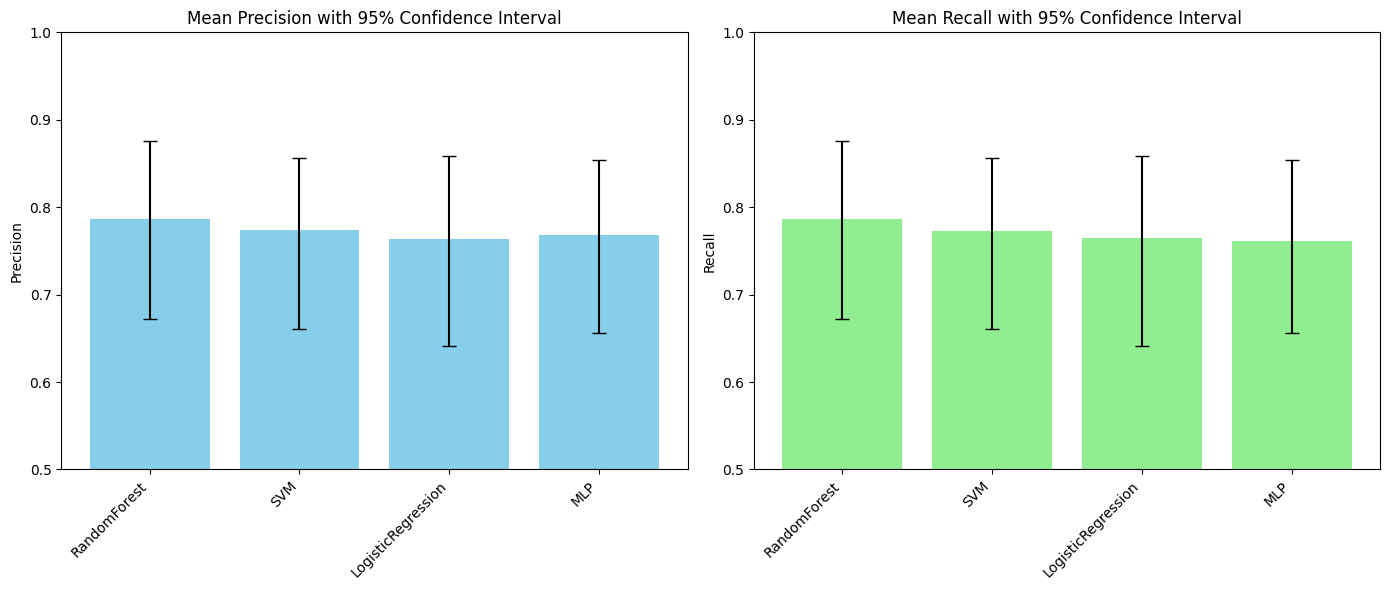

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot precision
ax[0].bar(models, mean_precisions, yerr=precision_errors, capsize=5, color='skyblue')
ax[0].set_title('Mean Precision with 95% Confidence Interval')
ax[0].set_ylabel('Precision')
ax[0].set_ylim([0.5, 1])
ax[0].set_xticklabels(models, rotation=45, ha="right")

# Plot recall
ax[1].bar(models, mean_recalls, yerr=recall_errors, capsize=5, color='lightgreen')
ax[1].set_title('Mean Recall with 95% Confidence Interval')
ax[1].set_ylabel('Recall')
ax[1].set_ylim([0.5, 1])
ax[1].set_xticklabels(models, rotation=45, ha="right")

plt.tight_layout()
plt.show()

Here are the final results: as you can see, the performance of the classifiers is very similar, with none of them significantly outperforming the others. However, Random Forest exhibits slightly higher precision and recall compared to the other models.